In [ ]:
# Jupyter notebooks have problems with imports from parent folder, so let's change the path
from jupyter_utils import change_path_to_parent
change_path_to_parent()

import matplotlib
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix

from optmethods.datasets import get_dataset
from optmethods.first_order import Adgd, AdgdAccel, Nesterov, Ogm, Polyak, RestNest
from optmethods.loss import LogisticRegression

sns.set(style="whitegrid", context="talk", palette=sns.color_palette("bright"), color_codes=False)
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'DejaVu Sans'
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['figure.figsize'] = (9, 6)

## Importance of controlling momentum

In [ ]:
dataset = 'w8a'
A, b = get_dataset(dataset)

loss = LogisticRegression(A, b, l1=0, l2=0)
n, dim = A.shape
L = loss.smoothness
l2 = L * 1e-6
loss.l2 = l2
x0 = csc_matrix((dim, 1))
n_epoch = 150
trace_len = 300
trace_path = f'../results/log_reg_{dataset}_l2_{relative_round(l2)}/'

In [10]:
from first_order import NestLine
n1 = NestLine(loss=loss, start_with_small_momentum=False, mu=l2)
n1.run(x0=x0_np.copy(), it_max=2100)

In [11]:
n2 = NestLine(loss=loss, start_with_small_momentum=True, mu=l2)
n2.run(x0=x0_np.copy(), it_max=2100)

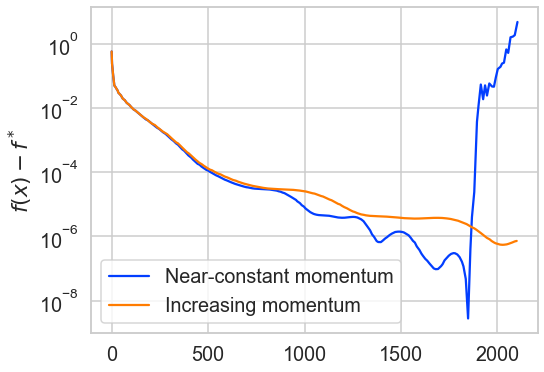

In [19]:
n1.trace.plot_losses(label='Near-constant momentum')
n2.trace.plot_losses(label='Increasing momentum')
plt.yscale('log')
plt.legend()